#### problem statement
1)Develop churn model with given data
create a ML model to predict customers, who will churn
document using jupyter notebook
focus on all the relevant steps of model building
Assess model : what metrics you will use and why?
2) Create customer segmentation using the same datafile to analyze what kind of customer base we have
document using jupyter notebook
Algorithms, variables: what and how?
Validation: How to attempt? Logic?
what will change in your methodology if segments are asked to be created for say based on profitability (for this assignment though, the objective is pretty generic)
Regards,

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
df = pd.read_csv("churnModelBase_Assignment2")

In [3]:
df.describe()

userID   Contact_ind  Customer_status  ActiveSinceDays  \
count  50000.000000  50000.000000     50000.000000     50000.000000   
mean   25000.500000      0.888900         2.822120       713.390560   
std    14433.901067      0.314259        15.547017       527.984288   
min        1.000000      0.000000      -999.000000      -999.000000   
25%    12500.750000      1.000000         3.000000       261.000000   
50%    25000.500000      1.000000         3.000000       551.000000   
75%    37500.250000      1.000000         4.000000      1081.000000   
max    50000.000000      1.000000         4.000000      2999.000000   

         num_AcD_m0   num_AcD_m1  r_AcD_m0_m12  r_AcD_m0_m123  \
count  50000.000000  50000.00000  50000.000000   50000.000000   
mean       4.386800      4.59760    112.890128     118.800457   
std        3.855557      4.18118    107.234056     103.332503   
min        1.000000      0.00000      4.444444       4.285714   
25%        2.000000      2.00000     55.555556      60.000000   
50%        3.000000      3.00000     88.888889      96.000000   
75%        6.000000      6.00000    133.333333     150.000000   
max       30.000000     31.00000   4600.000000    3450.000000   

       daystofirstload  dayssincelastload      ...         InAllRev_m1  \
count     50000.000000       50000.000000      ...        50000.000000   
mean        135.529600          30.789600      ...         2703.132630   
std         398.592531         183.071121      ...        10074.592506   
min        -999.000000        -999.000000      ...            0.000000   
25%           0.000000           9.000000      ...            0.000000   
50%           3.000000          39.000000      ...          300.000000   
75%         156.000000          94.000000      ...         1600.000000   
max        2569.000000         246.000000      ...       718900.000000   

         InAllRev_m2  r_InAllRev_m0_m1  r_InAllRev_m0_m2  tot_InAllRev_3m  \
count   50000.000000      5.000000e+04      5.000000e+04     5.000000e+04   
mean     2386.290340      4.985664e+04      6.558467e+04     7.872779e+03   
std      7119.815625      4.699331e+05      6.138574e+05     2.379699e+04   
min         0.000000      0.000000e+00      0.000000e+00     0.000000e+00   
25%         0.000000      0.000000e+00      0.000000e+00     5.000000e+02   
50%       407.000000      3.332973e+01      3.251484e+01     1.726000e+03   
75%      1728.812500      2.040013e+02      2.278268e+02     6.326872e+03   
max    556440.000000      3.431150e+07      6.506785e+07     2.342540e+06   

        OgAllRev_m0    OgAllRev_m1    OgAllRev_m2  tot_OgAllRev_3m  \
count  5.000000e+04   50000.000000   50000.000000     5.000000e+04   
mean   3.388236e+03    3167.911153    2811.217676     9.367364e+03   
std    1.252069e+04   10563.659045    8130.048248     2.692835e+04   
min    5.000000e-01       0.000000       0.000000     1.000000e+00   
25%    2.800000e+02     199.000000     100.000000     1.168000e+03   
50%    7.475800e+02     731.000000     624.000000     2.801000e+03   
75%    2.403000e+03    2388.000000    2300.000000     8.607000e+03   
max    1.152048e+06  760763.250000  703016.000000     2.577306e+06   

           targetid  
count  50000.000000  
mean       0.203500  
std        0.402605  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 112 columns]

In [4]:
df.head(10)

userID  Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  \
0       1            1                4              221           1   
1       2            1                4             1225           3   
2       3            1                3              838          18   
3       4            1                4              486           2   
4       5            1                3              928           1   
5       6            0                4              433           2   
6       7            1                4              512           1   
7       8            1                3              502           1   
8       9            1                3              322           7   
9      10            1                3             1170           1   

   num_AcD_m1  r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  \
0           2     50.000000      33.333333                0   
1           1    150.000000      90.000000                0   
2          19    120.000000     174.193548              724   
3           0    200.000000     200.000000                0   
4           1     33.333333      37.500000                0   
5           0    133.333333     100.000000                0   
6           2     40.000000      42.857143               50   
7           2     40.000000      37.500000              274   
8           7     82.352941     110.526316                0   
9           1     40.000000      60.000000                0   

   dayssincelastload    ...     InAllRev_m1  InAllRev_m2  r_InAllRev_m0_m1  \
0                153    ...            0.00       497.00          0.000000   
1                 14    ...          245.00       345.00        270.325203   
2                 47    ...        15000.00     13782.57         23.331778   
3                  3    ...            0.00         0.00      26400.000000   
4                147    ...            0.00        10.00          0.000000   
5                162    ...            0.00         0.00          0.000000   
6                 95    ...            0.00       300.00      30000.000000   
7                 52    ...            0.00         0.00     100000.000000   
8                  4    ...        31165.63     23032.00          1.501061   
9                 72    ...            0.00       523.14      23000.000000   

   r_InAllRev_m0_m2  tot_InAllRev_3m  OgAllRev_m0  OgAllRev_m1  OgAllRev_m2  \
0          0.000000           497.00       199.00       150.00       485.00   
1        192.196532          1255.00       839.00       245.00       345.00   
2         25.392551         32282.57     16730.64     15559.52     11196.57   
3      26400.000000           264.00       302.00         0.00         0.00   
4          0.000000            10.00       400.00         0.00       577.00   
5          0.000000             0.00        50.00         0.00        50.00   
6         99.667774           600.00       299.00         0.00       398.00   
7     100000.000000          1000.00      1000.00       140.00       300.00   
8          2.031129         54665.46      1315.62     31750.20     23145.16   
9         43.881406           753.14       229.00         0.00       523.72   

   tot_OgAllRev_3m  targetid  
0           834.00         0  
1          1429.00         0  
2         43486.73         0  
3           302.00         0  
4           977.00         0  
5           100.00         1  
6           697.00         1  
7          1440.00         0  
8         56210.98         0  
9           752.72         1  

[10 rows x 112 columns]

In [5]:
df1 = df.iloc[0:,0:58]
df2 = df.iloc[0:,58:]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 58 columns):
userID                      50000 non-null int64
Contact_ind                 50000 non-null int64
Customer_status             50000 non-null int64
ActiveSinceDays             50000 non-null int64
num_AcD_m0                  50000 non-null int64
num_AcD_m1                  50000 non-null int64
r_AcD_m0_m12                50000 non-null float64
r_AcD_m0_m123               50000 non-null float64
daystofirstload             50000 non-null int64
dayssincelastload           50000 non-null int64
tot_RevUo_m0                50000 non-null float64
tot_RevUo_m1                50000 non-null float64
tot_RevUo_m2                50000 non-null float64
r_tot_RevUo_m0_m1           50000 non-null float64
r_tot_RevUo_m1_m2           50000 non-null float64
r_tot_RevUo_m0_m12          50000 non-null float64
avg_RevUo_m0                50000 non-null float64
avg_RevUo_m1                50000 non-nu

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
tot_rechX_m0                50000 non-null int64
tot_rechX_m1                50000 non-null int64
tot_rechX_m2                50000 non-null int64
chg_rechX_l0_1m             50000 non-null float64
chg_rechX_l1_2m             50000 non-null float64
avg_rechX_m0                50000 non-null float64
avg_rechX_m1                50000 non-null float64
avg_rechX_m2                50000 non-null float64
max_rechX_m0                50000 non-null int64
max_rechX_m1                50000 non-null int64
max_rechX_m2                50000 non-null int64
r_avg_max_rechX_m0          43122 non-null float64
r_avg_max_rechX_m1          38273 non-null float64
r_avg_max_rechX_m2          35917 non-null float64
rechtxns_cnt_m0             50000 non-null int64
rechtxns_cnt_m1             50000 non-null int64
rechtxns_cnt_m2             50000 non-null int64
rechtxn_dayscnt_m0          50000 non-null

In [8]:
import matplotlib.pyplot as plt

In [9]:
#Removing missing values 
df.dropna(inplace = True)
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

userID  Contact_ind  Customer_status  ActiveSinceDays  num_AcD_m0  \
0        1            1                4              221           1   
1        2            1                4             1225           3   
2        3            1                3              838          18   
8        9            1                3              322           7   
11      12            1                3              861           6   

    num_AcD_m1  r_AcD_m0_m12  r_AcD_m0_m123  daystofirstload  \
0            2     50.000000      33.333333                0   
1            1    150.000000      90.000000                0   
2           19    120.000000     174.193548              724   
8            7     82.352941     110.526316                0   
11           5    150.000000     150.000000                0   

    dayssincelastload    ...     InAllRev_m1  InAllRev_m2  r_InAllRev_m0_m1  \
0                 153    ...            0.00       497.00          0.000000   
1                  14    ...          245.00       345.00        270.325203   
2                  47    ...        15000.00     13782.57         23.331778   
8                   4    ...        31165.63     23032.00          1.501061   
11                 11    ...         1000.00       500.00         99.900100   

    r_InAllRev_m0_m2  tot_InAllRev_3m  OgAllRev_m0  OgAllRev_m1  OgAllRev_m2  \
0           0.000000           497.00       199.00       150.00       485.00   
1         192.196532          1255.00       839.00       245.00       345.00   
2          25.392551         32282.57     16730.64     15559.52     11196.57   
8           2.031129         54665.46      1315.62     31750.20     23145.16   
11        199.600798          2500.00       714.00      1053.00       537.00   

    tot_OgAllRev_3m  targetid  
0            834.00         0  
1           1429.00         0  
2          43486.73         0  
8          56210.98         0  
11          2304.00         0  

[5 rows x 112 columns]

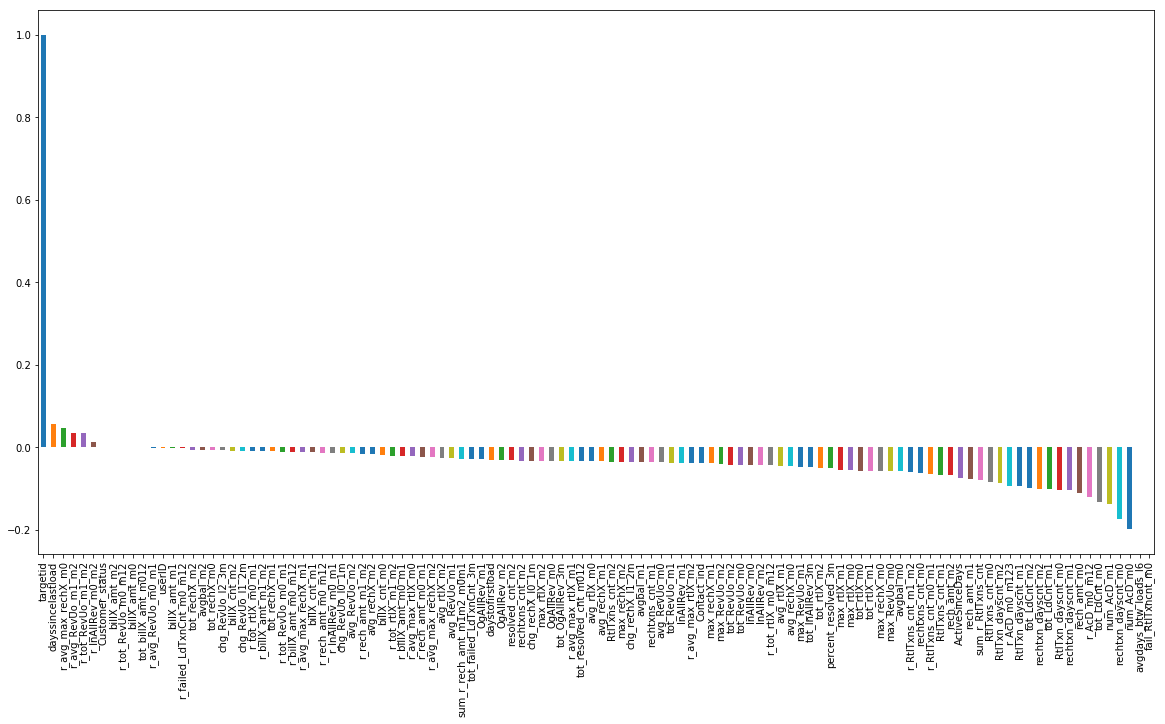

In [10]:
plt.figure(figsize=(20,10))
df_dummies.corr()['targetid'].sort_values(ascending = False).plot(kind='bar')

In [11]:
y = df_dummies['targetid'].values
X = df_dummies.drop(columns = ['targetid'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8662033014769766


AxesSubplot(0.125,0.125;0.775x0.755)


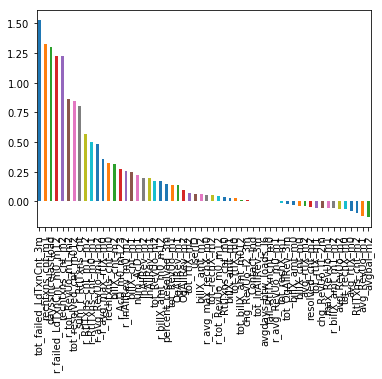

In [15]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:58].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


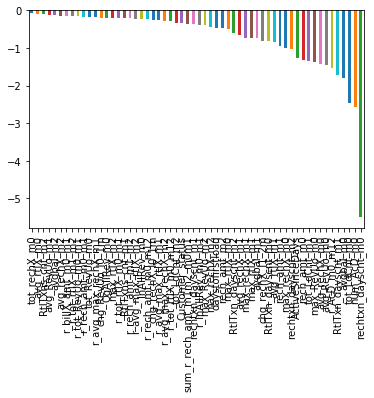

In [16]:
print(weights.sort_values(ascending = False)[-58:].plot(kind='bar'))

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(confusion_matrix(y_test,prediction_test))
print('\n')
print(classification_report(y_test,prediction_test))

[[4984    1]
 [ 769    1]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4985
           1       0.50      0.00      0.00       770

   micro avg       0.87      0.87      0.87      5755
   macro avg       0.68      0.50      0.47      5755
weighted avg       0.82      0.87      0.80      5755



In [19]:
pip install Boruta


The following command must be run outside of the IPython shell:

    $ pip install Boruta

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = X_train.values
y = y_train
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	111
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	111
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	111
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	111
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	111
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	111
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	111
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	85
Tentative: 	14
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	85
Tentative: 	14
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	85
Tentative: 	14
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	85
Tentative: 	14
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	86
Tentative: 	13
Rejected: 	12
Iteration: 	13 / 100
Confirmed: 	86
Tentative: 	9
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	86
Tentative: 	9
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	86
Tentative: 	9
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	86
Tentativ

In [21]:
sd= pd.DataFrame(X_filtered)

In [22]:
X_filtered

array([[0.32466233, 0.37931034, 0.16129032, ..., 0.00087281, 0.00087907,
        0.00111163],
       [0.31415708, 0.03448276, 0.16129032, ..., 0.00252772, 0.00159314,
        0.00150662],
       [0.69234617, 0.4137931 , 0.29032258, ..., 0.00271832, 0.00175956,
        0.00211269],
       ...,
       [0.28164082, 0.13793103, 0.61290323, ..., 0.00410509, 0.00755459,
        0.00337642],
       [0.33191596, 0.03448276, 0.06451613, ..., 0.00084398, 0.00152207,
        0.00084735],
       [0.32991496, 0.10344828, 0.09677419, ..., 0.0011081 , 0.00120765,
        0.00100687]])

In [23]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(sd,y_train)
sd_test=feat_selector.transform(X_test.values)
preds = model.svm.predict(sd_test)
metrics.accuracy_score(y_test, preds)


0.8662033014769766

In [24]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

[[4985    0]
 [ 770    0]]


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(sd, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
from sklearn import metrics
prediction_test = model.predict(sd_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))


0.8662033014769766


## Customer Segmentation

RFM model

In [60]:
#recency
customer_history_df = df[['userID', 'dayssincelastload']].groupby("userID").min().reset_index()
customer_history_df.rename(columns={'dayssincelastload':'recency'}, inplace=True)
customer_history_df.describe().transpose()

count          mean           std    min      25%      50%  \
userID   19183.0  25019.126675  14446.014927    1.0  12446.5  24996.0   
recency  19183.0     28.064797    166.831975 -999.0      7.0     25.0   

             75%      max  
userID   37544.5  49997.0  
recency     84.0    246.0

In [62]:
customer_history_df['recency'] = customer_history_df['recency'] + 1

In [35]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


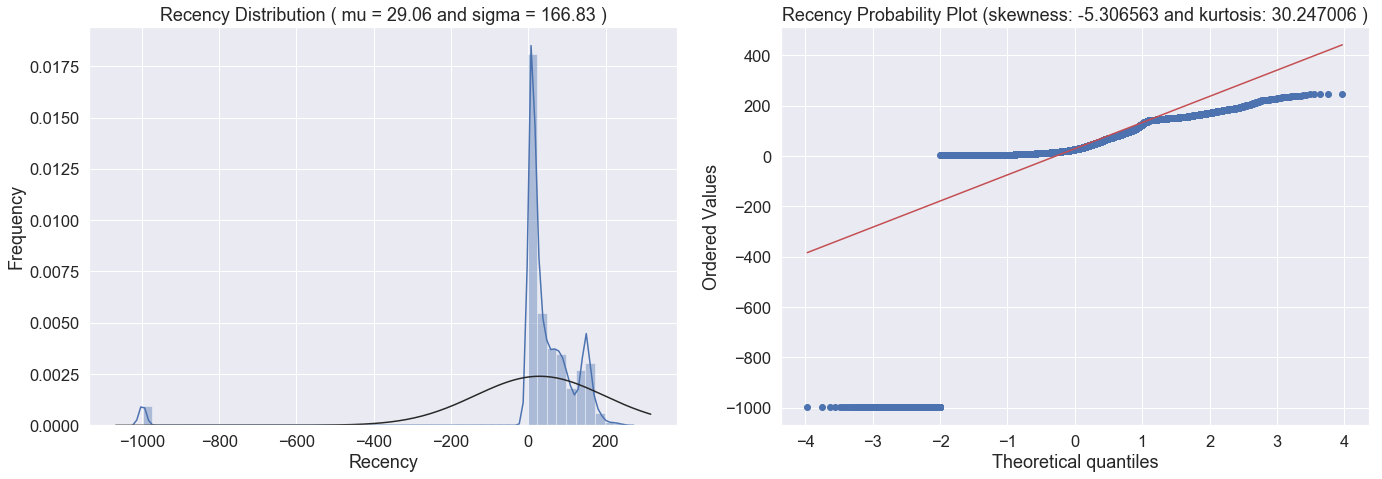

In [64]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(customer_history_df.recency, 'Recency')

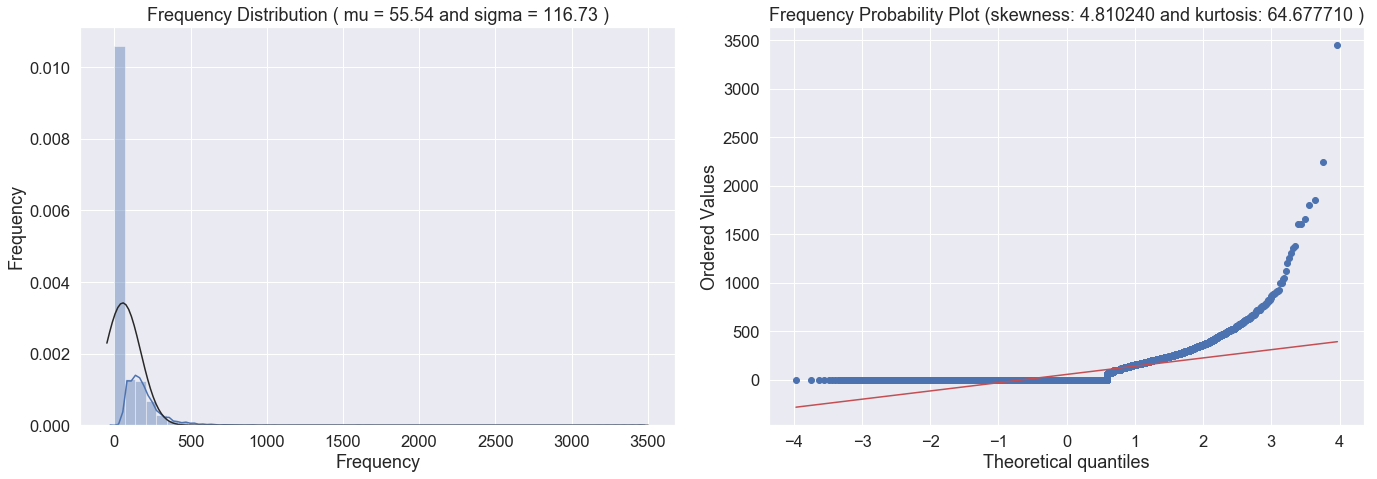

In [65]:
customer_freq = (df[['userID', 'sum_r_RtlTxns_cnt']])
customer_freq.rename(columns={'sum_r_RtlTxns_cnt':'frequency'}, inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')

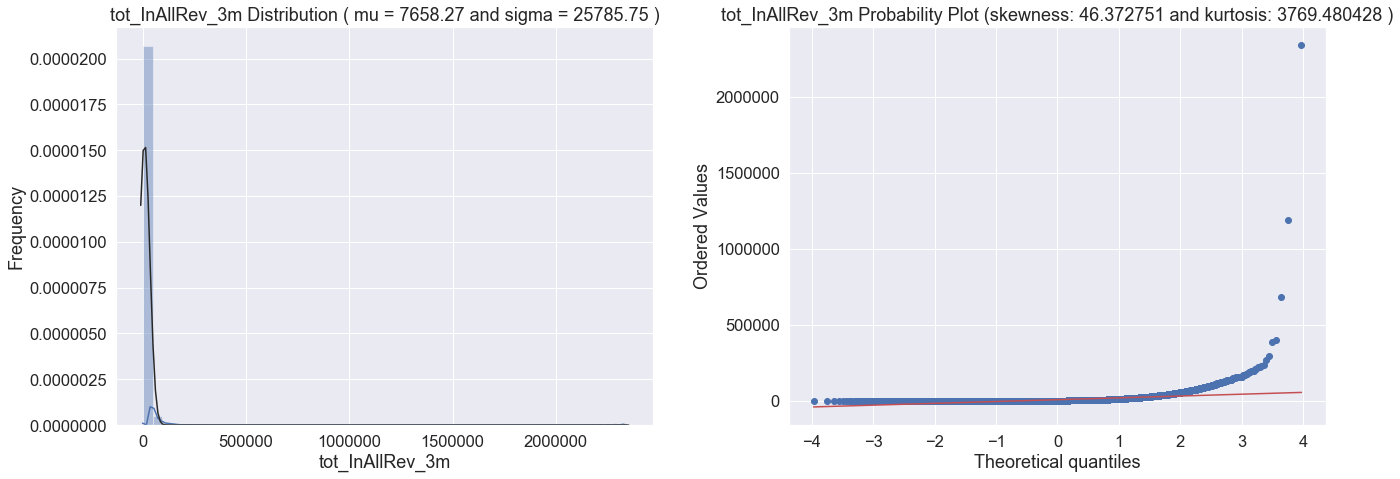

In [66]:
customer_monetary_val = df[['userID', 'tot_InAllRev_3m']]
customer_monetary_val.rename(columns={'tot_InAllRev_3m':'amount'}, inplace=True)
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.amount, 'tot_InAllRev_3m')

In [67]:
customer_history_df.describe()

userID       recency     frequency        amount
count  19183.000000  19183.000000  19183.000000  1.918300e+04
mean   25019.126675     29.064797     55.536547  7.658268e+03
std    14446.014927    166.831975    116.728251  2.578642e+04
min        1.000000   -998.000000      0.000000  0.000000e+00
25%    12446.500000      8.000000      0.000000  5.125000e+02
50%    24996.000000     26.000000      0.000000  1.702000e+03
75%    37544.500000     85.000000     83.333333  6.481000e+03
max    49997.000000    247.000000   3454.761905  2.342540e+06

In [68]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [79]:
customer_history_df = customer_history_df[customer_history_df.recency > 0]

In [80]:
customer_history_df =customer_history_df[customer_history_df.frequency >0]
customer_history_df =customer_history_df[customer_history_df.amount > 0]

In [81]:
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

count          mean       std       min       25%       50%  \
amount_log     5103.0  3.022818e-16  1.000098 -7.163279 -0.582203  0.083169   
recency_log    5103.0  2.207392e-16  1.000098 -1.637139 -0.859457 -0.100699   
frequency_log  5103.0 -1.114553e-15  1.000098 -2.856359 -0.673308 -0.007364   

                    75%       max  
amount_log     0.651951  4.553076  
recency_log    0.868586  2.275311  
frequency_log  0.606555  5.632914

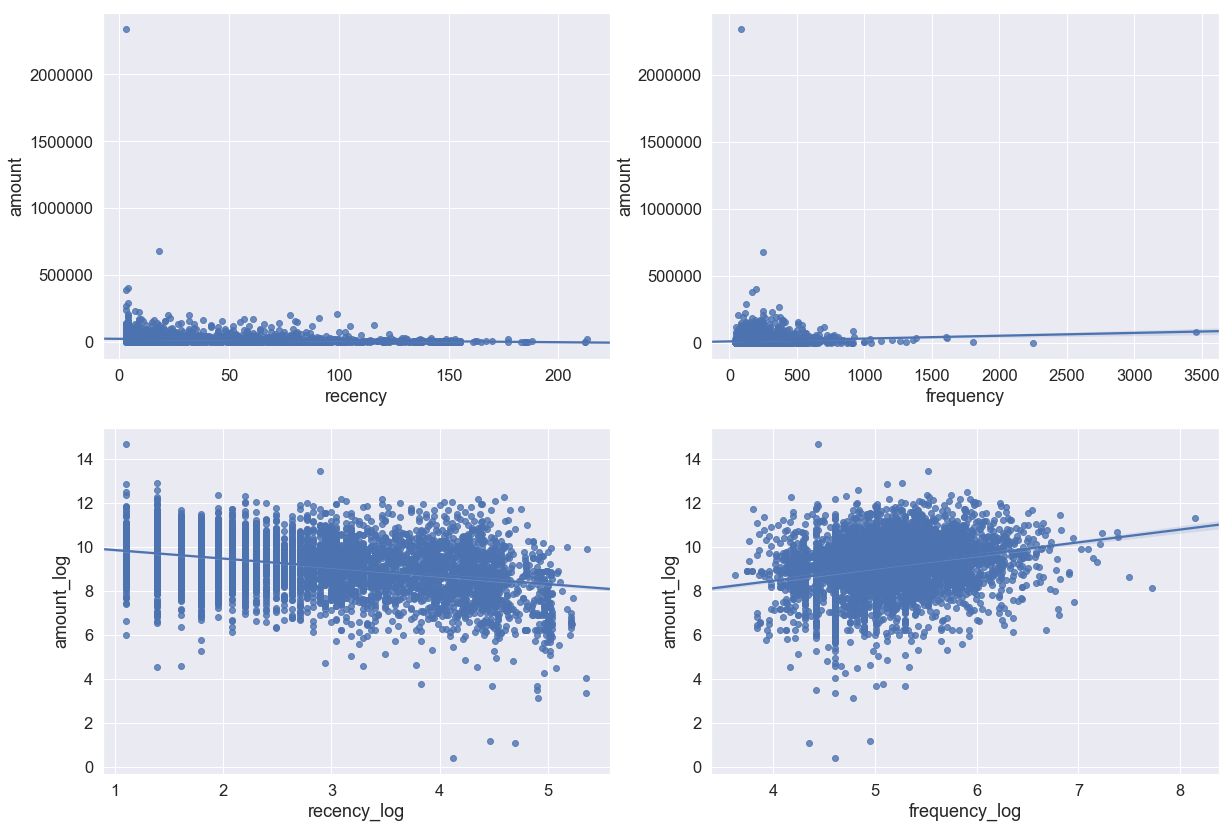

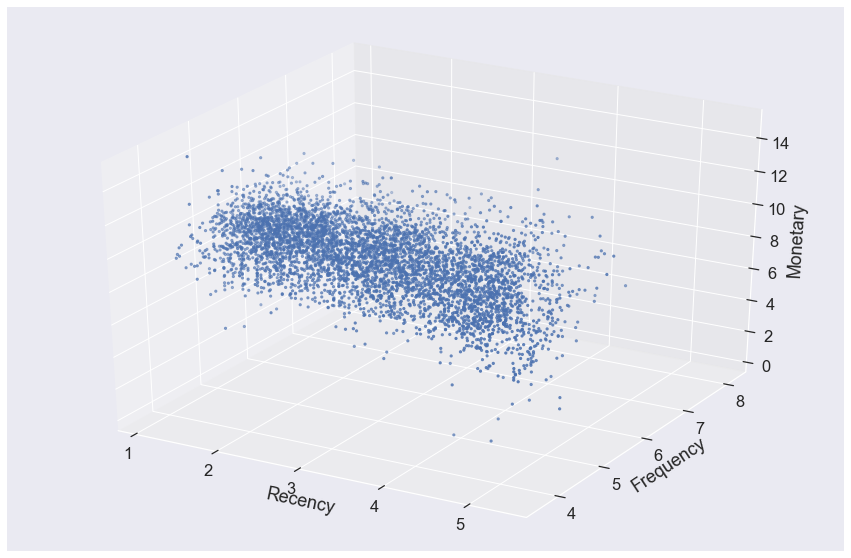

In [82]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

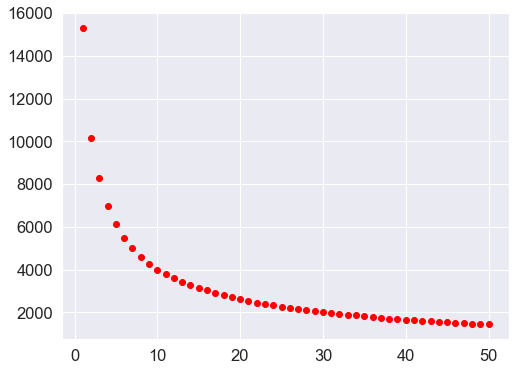

The best K sugest:  6


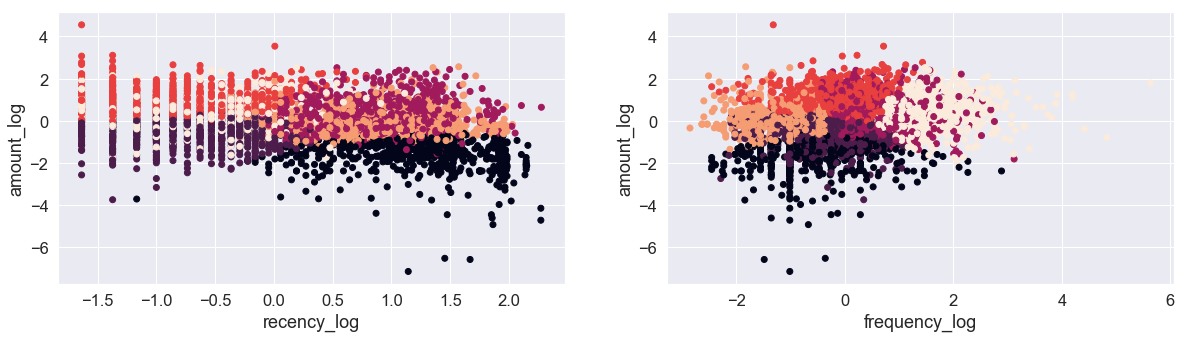

In [83]:
#elbow method
cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

In [108]:
#apply k-means
kmeans = KMeans(n_clusters =6, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0) 
customer_history_df['segments'] = y_kmeans = kmeans.fit_predict(X_scaled)

In [109]:
customer_history_df.head()

userID  recency   frequency    amount  recency_log  frequency_log  \
2        3       48  379.166667  32282.57     3.871201       5.937976   
3        9        5  150.000000  54665.46     1.609438       5.010635   
5       13        4  140.000000   8725.76     1.386294       4.941642   
10      34       40  100.000000   5005.13     3.688879       4.605170   
11      36        3  145.000000  29373.54     1.098612       4.976734   

    amount_log  segments  
2    10.382283         5  
3    10.908987         4  
5     9.074035         0  
10    8.518219         1  
11   10.287850         4